In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [2]:
#Load dataset
df = pd.read_csv('Data\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#checking unique values
for k in df.columns:
    print()
    print(str(k))
    print(df[k].value_counts())


id
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

date
6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
1/17/2015      1
5/15/2015      1
1/10/2015      1
3/8/2015       1
5/17/2014      1
Name: date, Length: 372, dtype: int64

price
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

bathrooms
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.0

In [6]:
df['date'].str.split('/', expand=True)[2].value_counts()


2014    14622
2015     6975
Name: 2, dtype: int64

In [7]:
#creating a column showing the year sold extracted from
#date column
df['year_sold'] = df['date'].str.split('/', expand=True)[2].astype('float64')

In [8]:
#dropping the id and date columns as they are not necessary
#for this analysis
df.drop(['id', 'date'], axis=1, inplace=True)

In [9]:
#creating a column showing the age of the houses sold
df['age'] = df.year_sold - df.yr_built

In [10]:
#dropping the yr_built column as it is also not necessary
#for this analysis
df.drop('yr_built', axis=1, inplace=True)

In [11]:
#replacing the placeholder value with the most common
#occurrence
df['sqft_basement'] = df.sqft_basement.replace('?', 0.0)

In [12]:
#converting the column to a float
df['sqft_basement'] = df.sqft_basement.astype('float64')

In [13]:
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [14]:
df.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
year_sold           0
age                 0
dtype: int64

In [15]:
#drop yr_renovated column due to significant placeholder
#and missing values
df.drop('yr_renovated', axis=1, inplace=True)

In [16]:
#filling null values with the most prevalent value
df.waterfront.fillna('NO', inplace=True)

In [17]:
df.isnull().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
year_sold         0
age               0
dtype: int64

In [18]:
df.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [19]:
df.view.fillna('NONE', inplace=True)

In [20]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year_sold        0
age              0
dtype: int64

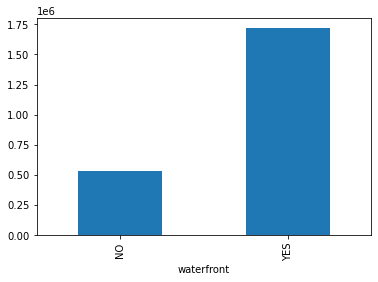

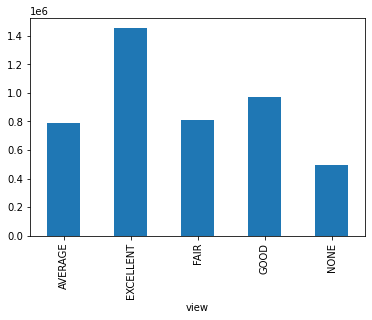

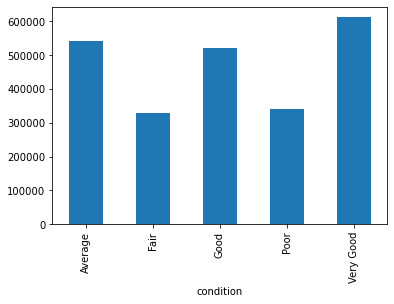

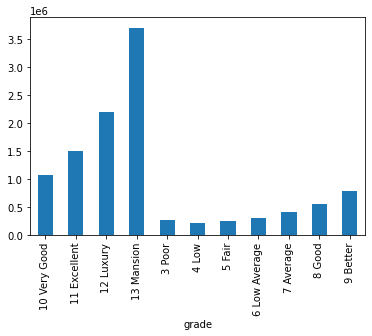

In [21]:
#investigating the relationship between price and the categorical
#variables
for col in df.select_dtypes(include = 'object'):
    if col != 'price':
        df.groupby([col])['price'].mean().plot.bar()
        plt.show()

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


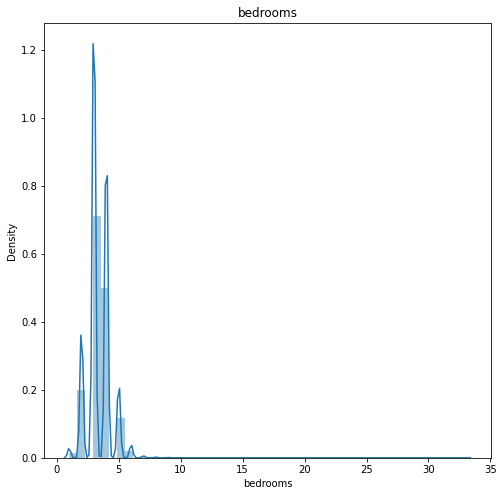

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


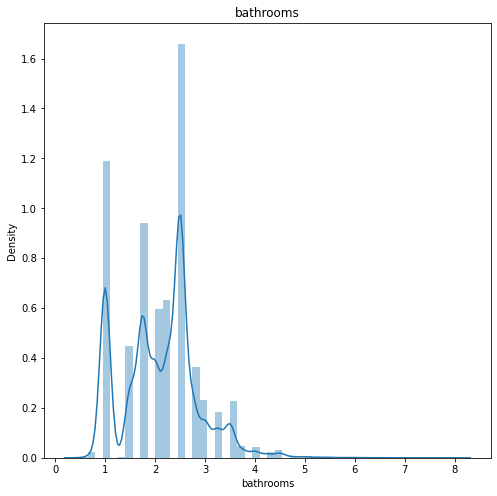

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


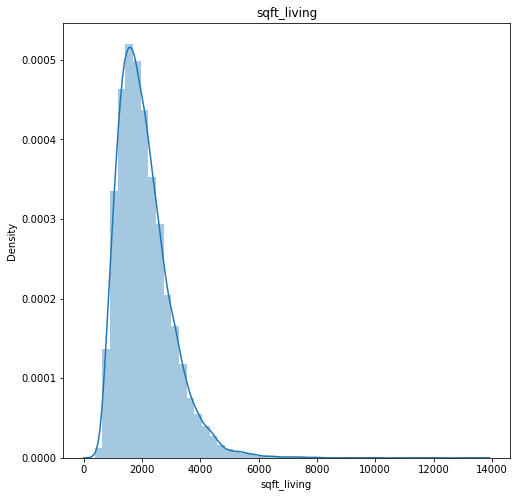

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


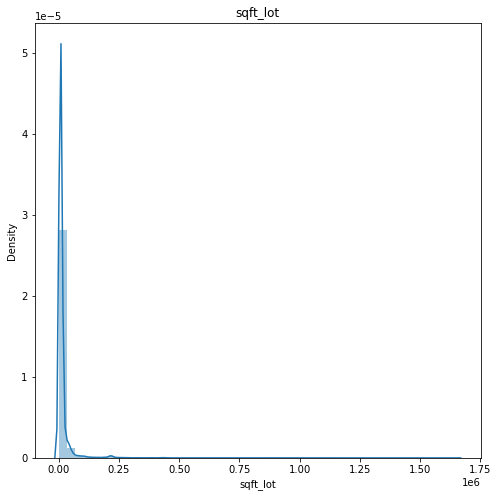

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


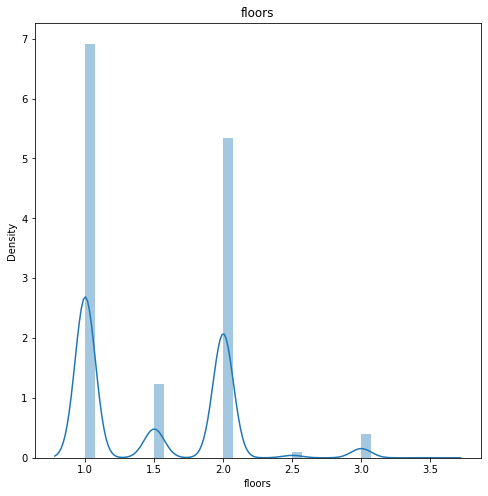

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


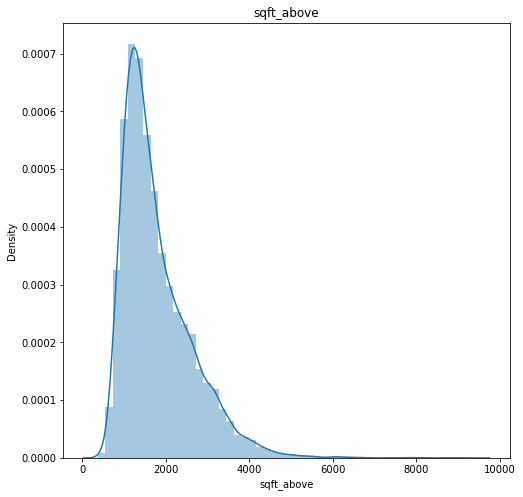

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


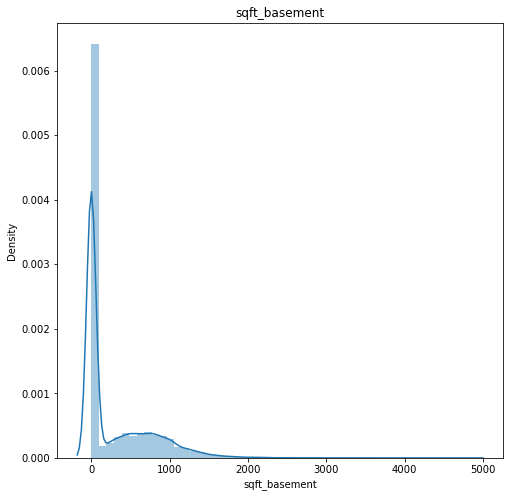

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


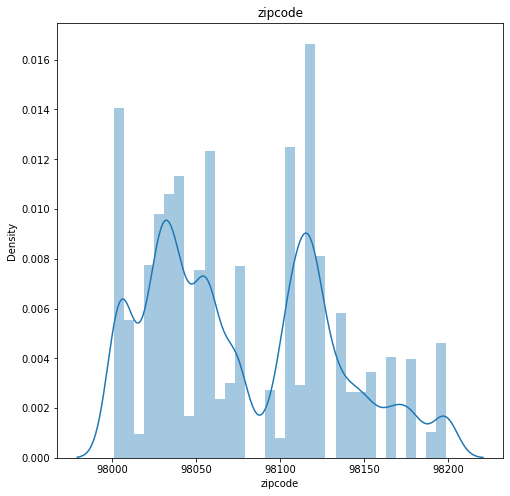

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


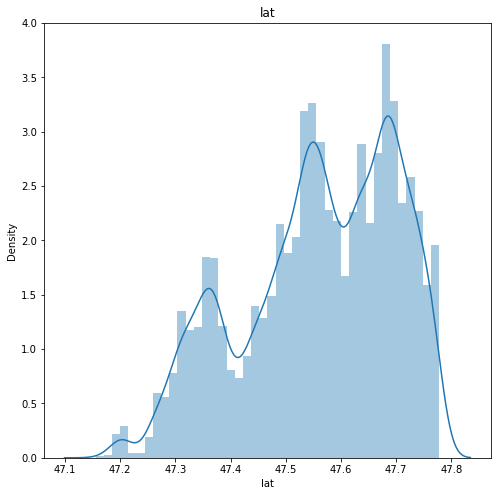

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


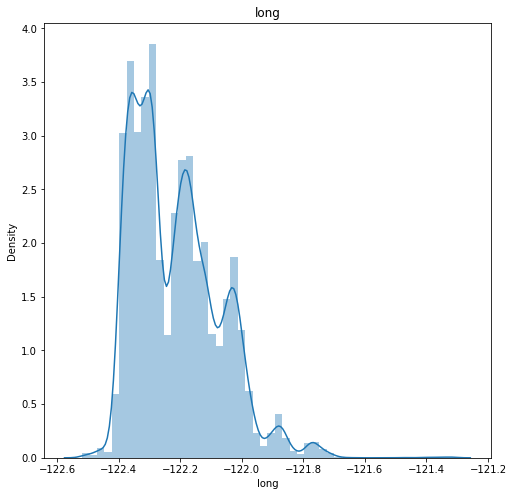

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


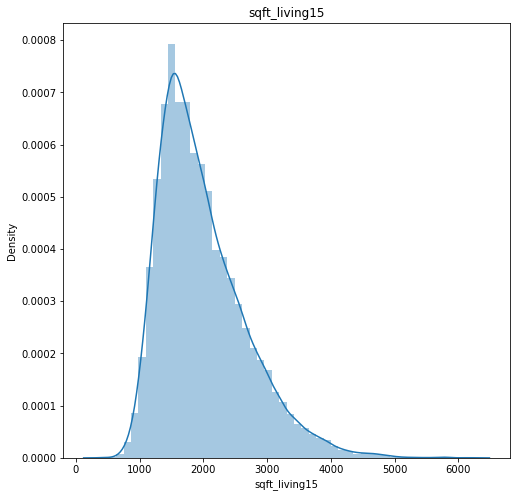

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


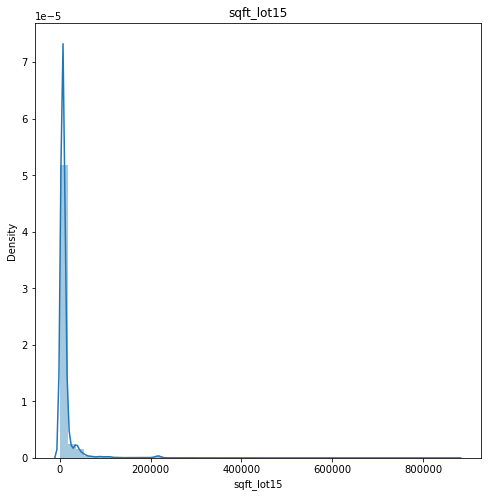

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


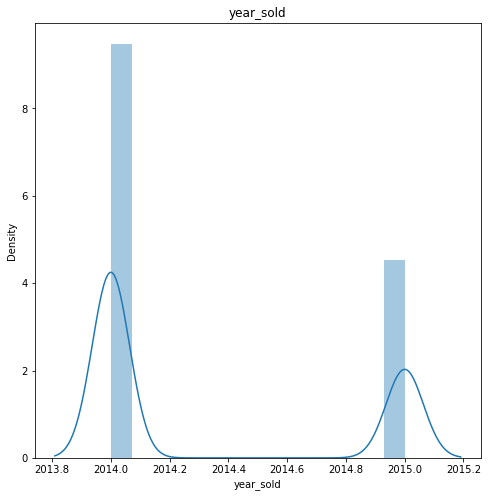

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


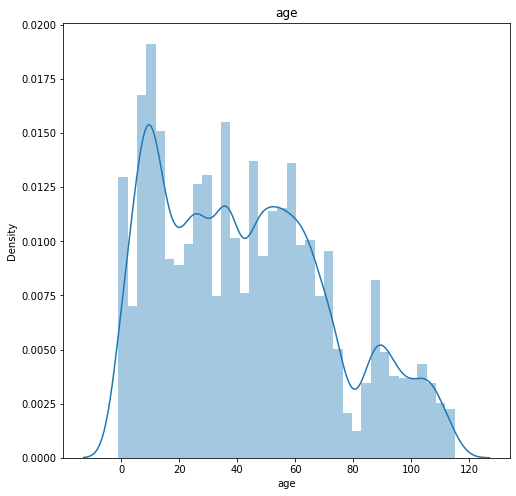

In [22]:
#checking whether data is normally distributed
for k in df.select_dtypes(exclude='object'):
    if k != 'price':
        plt.figure(figsize=(8,8))
        sns.distplot(df[k])
        plt.title(k)
        plt.show()

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


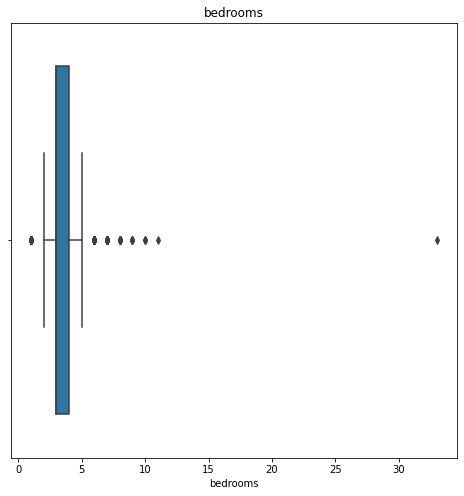

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


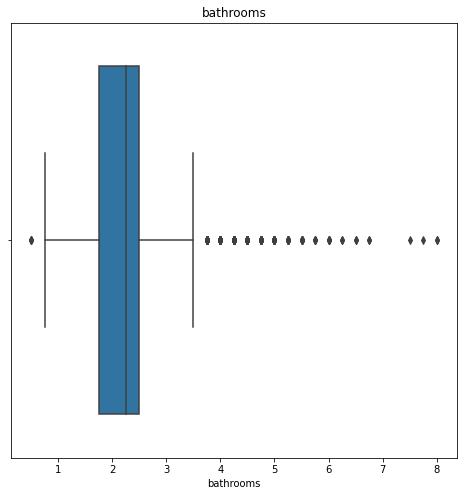

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


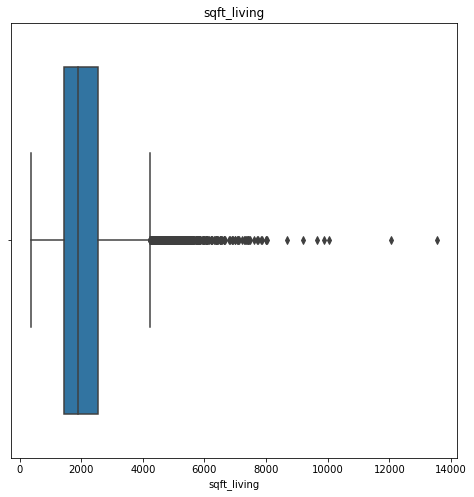

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


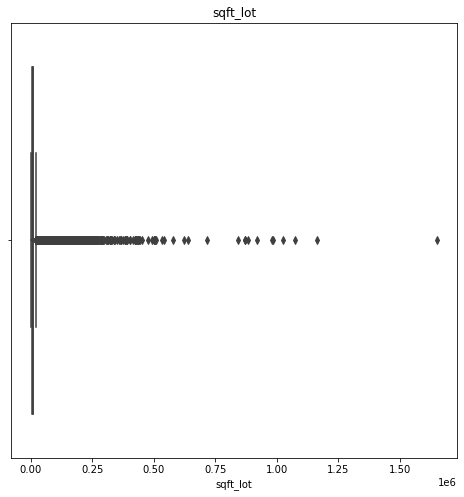

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


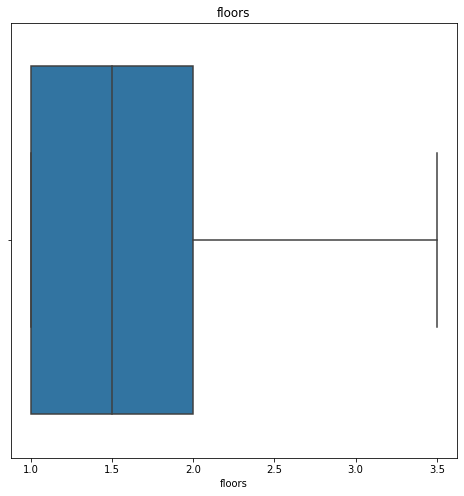

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


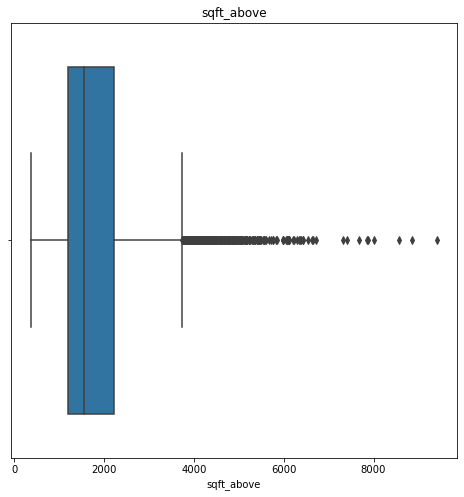

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


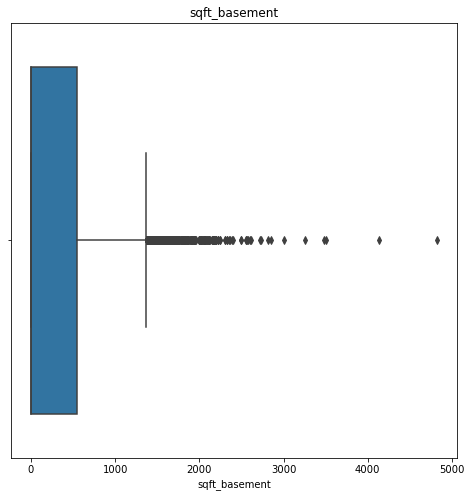

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


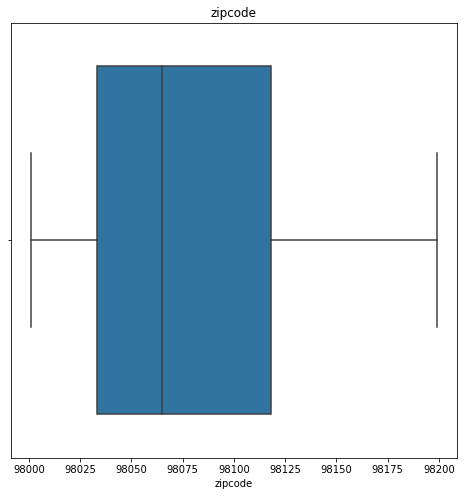

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


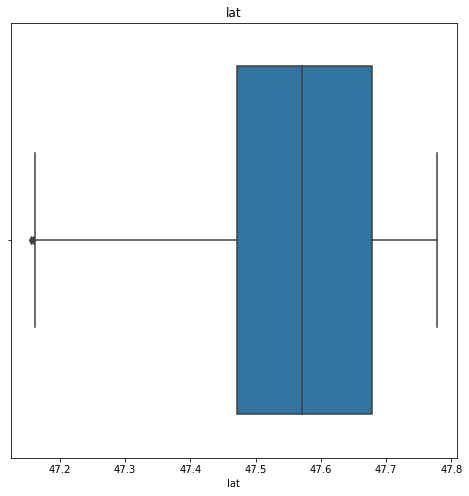

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


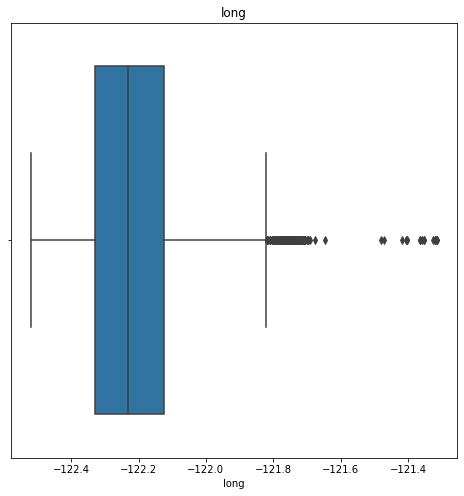

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


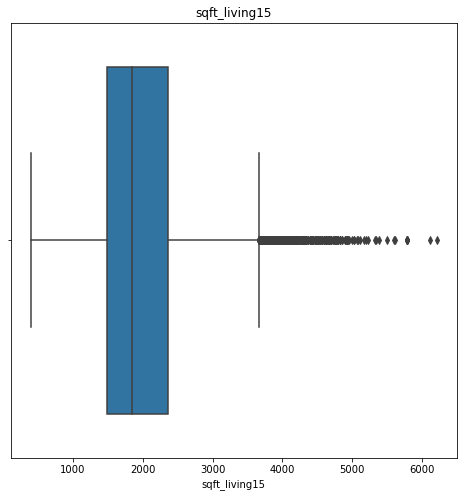

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


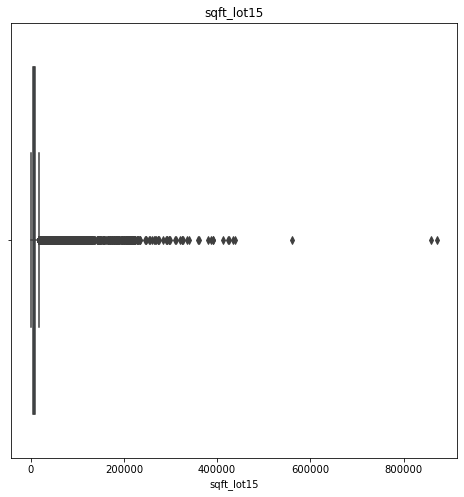

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


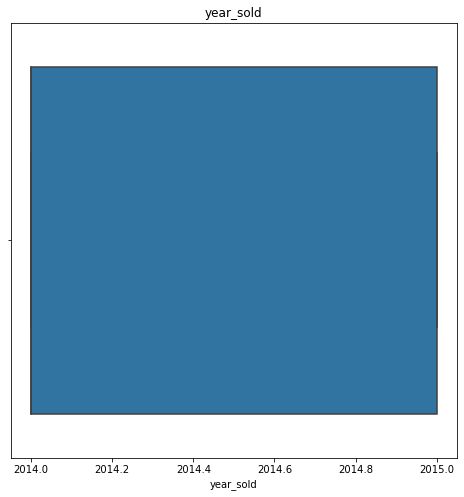

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


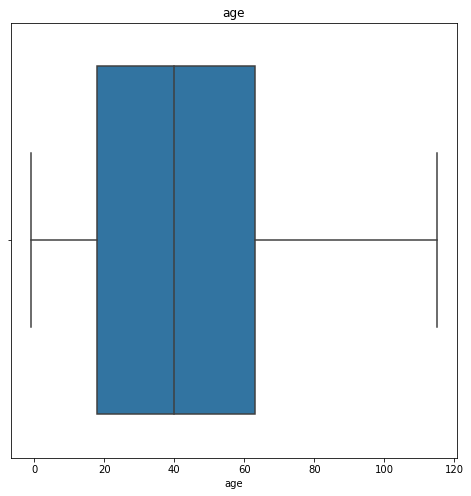

In [23]:
#checking for outliers
for k in df.select_dtypes(exclude='object'):
    if k != 'price':
        plt.figure(figsize=(8,8))
        sns.boxplot(df[k])
        plt.title(k)
        plt.show()

In [24]:
df['waterfront'] = np.where(df['waterfront'] == 'NO', 0,1)

In [25]:
df['view'] = np.where((df['view'] == 'AVERAGE'), 2, 
         np.where((df['view'] == 'EXCELLENT'), 4,
                 np.where((df['view'] == 'FAIR'), 1,
                         np.where((df['view'] == 'GOOD'), 3,
                                 np.where((df['view'] == 'NONE'), 0, 5)))))

In [26]:
df.view.value_counts()

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

In [27]:
#df_c['view'].value_counts()

In [28]:
#converting condition to a numerical value
df['condition'] = df.condition.map(lambda x: 1 if x=='Poor' 
                                else (2 if x=='Fair'
                                else (3 if x=='Average'
                                else  (4 if x=='Good'
                                else 5
                                ))))

In [29]:
#df_c.condition.value_counts()

In [30]:
#Using a lambda function with map to extract numeral and convert to numeric values
df['grade'] = df.grade.map(lambda x: int(''.join(filter(str.isdigit, x))))

In [31]:
#df_c['grade']

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int32  
 7   view           21597 non-null  int32  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  zipcode        21597 non-null  int64  
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
 17  year_sold      21597 non-null  float64
 18  age   

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


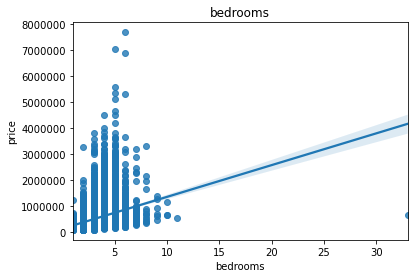

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


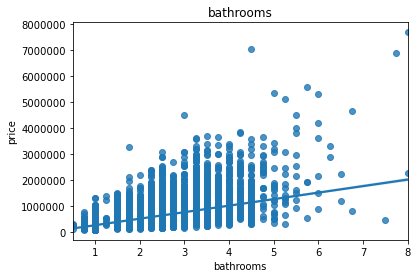

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


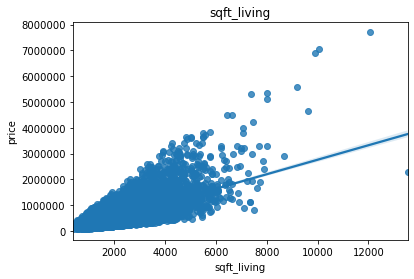

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


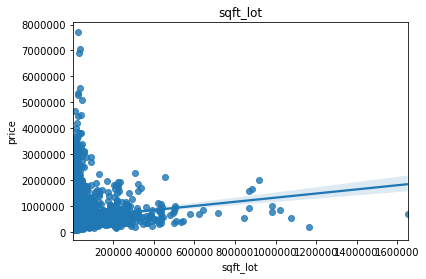

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


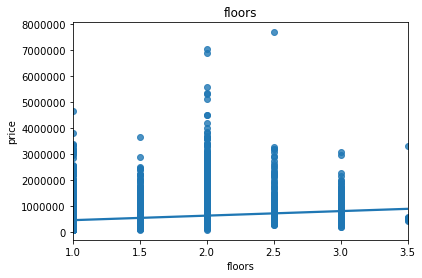

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


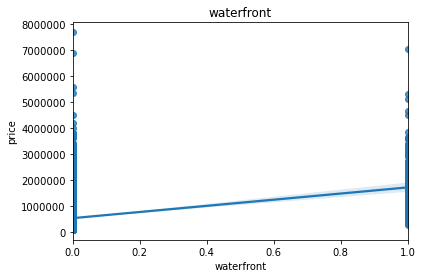

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


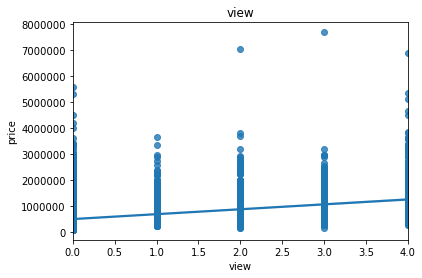

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


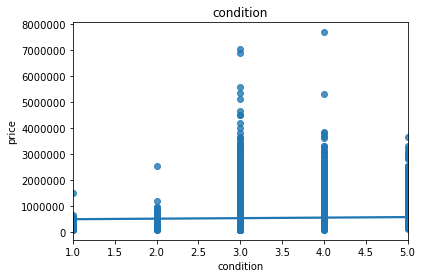

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


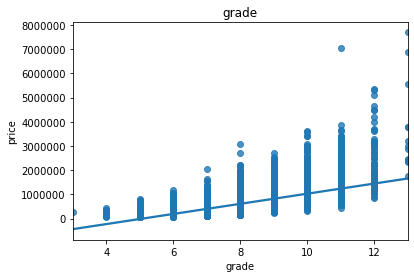

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


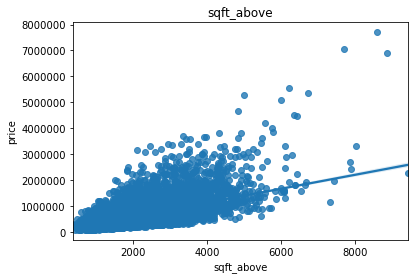

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


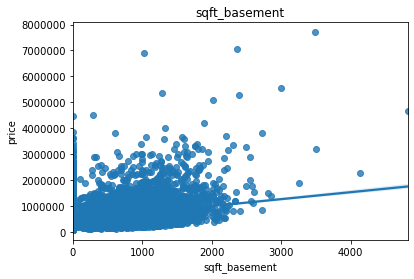

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


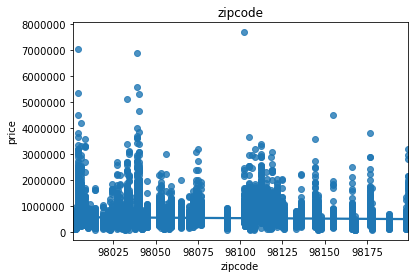

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


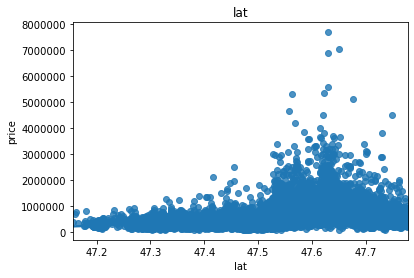

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


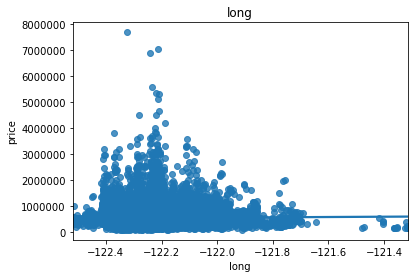

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


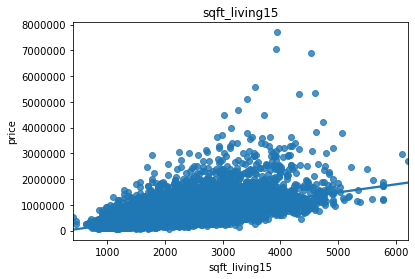

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


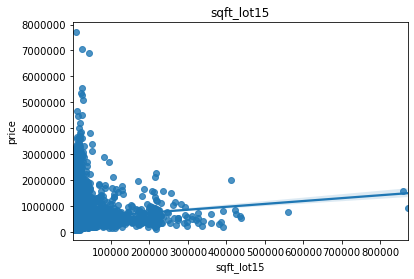

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


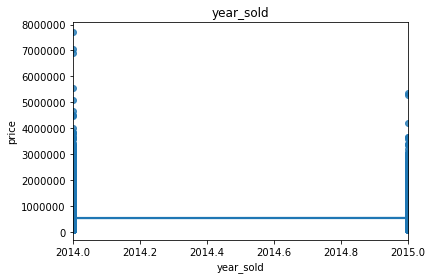

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


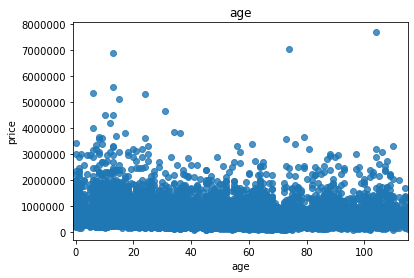

In [33]:
#investigating whether a linear relationship exists between dependent 
#and independent variables
df_b = df.drop('price', axis=1)
for col in df_b.columns:
    sns.regplot(df_b[col], df.price)
    plt.title(col)
    plt.ticklabel_format(style='plain')
    plt.show()

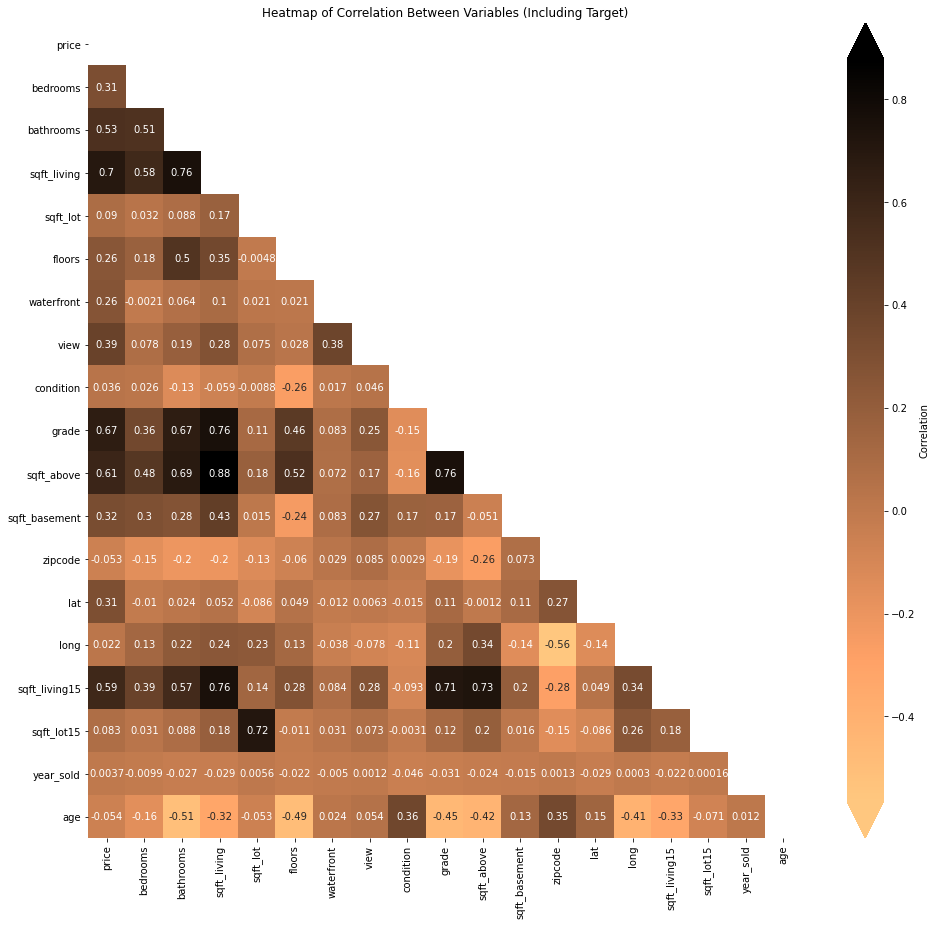

In [37]:
#setting up correlation matrix
correlation_matrix = df.corr()

#set up figure and axes
fig, ax = plt.subplots(figsize=(16,15))
#ploting a heatmap from correlation matrix
sns.heatmap(data=correlation_matrix, cmap='copper_r', 
            mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)),
            ax=ax, 
            annot=True,
            cbar_kws={"label": "Correlation", "orientation": "vertical", "extend": "both"}
            )
            
#setting plot title
ax.set_title("Heatmap of Correlation Between Variables (Including Target)");


# Modelling

Since we will be building a number of models, it is sensible to define a function that will be used to create the regression models

In [134]:
#linear regression function
def reg_model(data):
    #independent and dependent variables
    X = data.drop('price', axis=1)
    y = data.price
    
    #splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    #Fit the model
    reg = LinearRegression()
    model = reg.fit(X_train, y_train)
    
    #examine model acurracy
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    #output some model results
    print('Training Score:', round(train_accuracy, 2))
    print('Test Score:', round(test_accuracy, 2))
    
    #view summary statistics from statsmodels
    X_train_b = sm.add_constant(X_train)
    model_sm = sm.OLS(y_train, X_train_b).fit()
    model_sm_summ = model_sm.summary()
    print(model_sm_summ)
    
    

## Model 1

In [135]:
model1 = reg_model(df)

Training Score: 0.7
Test Score: 0.71
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2232.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:48:00   Log-Likelihood:            -2.3579e+05
No. Observations:               17277   AIC:                         4.716e+05
Df Residuals:                   17258   BIC:                         4.718e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const    

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


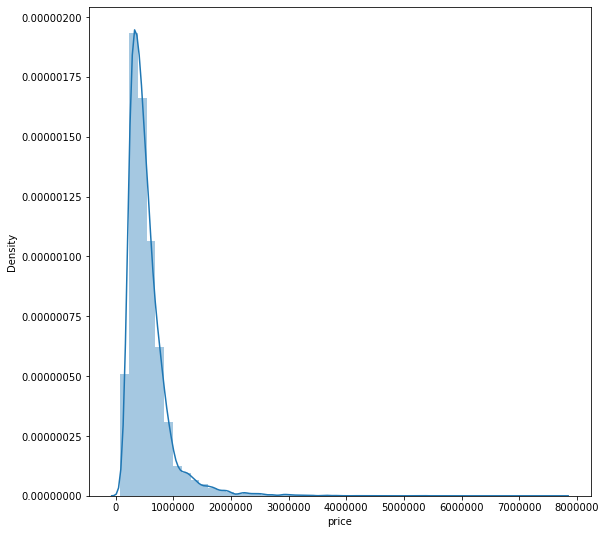

In [73]:
#checking the distribution of the dependent variable
plt.figure(figsize=(9,9))
sns.distplot(df.price)
plt.ticklabel_format(style='plain')

The price column shows a positive skew. We will try and normalize the dependent variable by removing outliers.

## Model 2

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

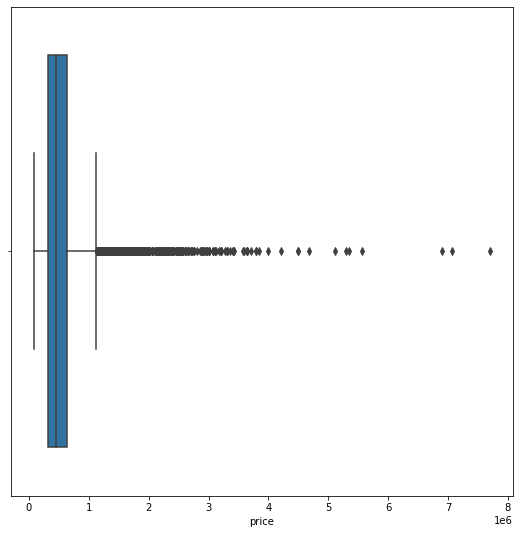

In [108]:
#box plot of the dependent variable
plt.figure(figsize=(9,9))
sns.boxplot(df.price)

C:\Users\Me\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

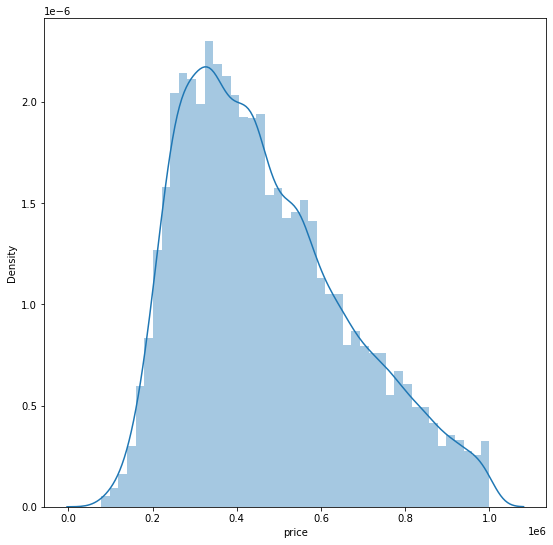

In [107]:
plt.figure(figsize=(9,9))
sns.distplot(df[df['price'] <= 1000000].price)

Setting a threshold of $1m brings our dependent variable much closer to a normal distribution despite the slight skewness that has persisted. We will build a model using this transformation.

In [111]:
df2 = df[df['price'] <= 1000000]

In [136]:
model = reg_model(df2)

Training Score: 0.69
Test Score: 0.69
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     2258.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:48:22   Log-Likelihood:            -2.0976e+05
No. Observations:               16111   AIC:                         4.195e+05
Df Residuals:                   16094   BIC:                         4.197e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const   

The R squared has remained largely the same even after this transformation but it is clear that the floors and the sqft_lot variables have p_values that are insignificant. Let us carry out multicollinearity testing before making the decision to drop the variables.

## Model 3

In [113]:
df2.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age
price,1.000000,0.288019,0.439473,0.604188,0.094206,0.269781,0.051719,0.213743,0.033648,0.617413,0.515646,0.218295,-0.019219,0.440495,0.078016,0.549455,0.082217,0.002428,-0.058067
bedrooms,0.288019,1.000000,0.488216,0.586933,0.024470,0.152629,-0.026539,0.030112,0.024711,0.314360,0.463610,0.274455,-0.150321,-0.034814,0.141548,0.369837,0.021523,-0.008700,-0.160798
bathrooms,0.439473,0.488216,1.000000,0.711427,0.062130,0.502842,-0.006343,0.083231,-0.139724,0.605800,0.632462,0.211850,-0.211765,-0.017091,0.250920,0.521096,0.062477,-0.028185,-0.549834
sqft_living,0.604188,0.586933,0.711427,1.000000,0.157283,0.336831,0.000557,0.150369,-0.075281,0.693967,0.849981,0.366525,-0.209951,0.000566,0.290356,0.731921,0.171520,-0.030516,-0.356650
sqft_lot,0.094206,0.024470,0.062130,0.157283,1.000000,-0.018403,0.025741,0.081688,-0.002291,0.090719,0.159668,0.012831,-0.128974,-0.095993,0.218641,0.140895,0.705888,0.000298,-0.040588
floors,0.269781,0.152629,0.502842,0.336831,-0.018403,1.000000,-0.006636,-0.017506,-0.278537,0.457161,0.528172,-0.296677,-0.066815,0.032889,0.137034,0.267230,-0.022605,-0.020831,-0.514381
waterfront,0.051719,-0.026539,-0.006343,0.000557,0.025741,-0.006636,1.000000,0.281883,0.011949,-0.013077,-0.009847,0.019211,0.043170,-0.041658,-0.055318,0.005149,0.031852,-0.008821,0.034899
view,0.213743,0.030112,0.083231,0.150369,0.081688,-0.017506,0.281883,1.000000,0.030555,0.117118,0.055941,0.179347,0.101439,-0.032677,-0.076485,0.170189,0.078347,0.000937,0.068125
condition,0.033648,0.024711,-0.139724,-0.075281,-0.002291,-0.278537,0.011949,0.030555,1.000000,-0.174178,-0.180330,0.171474,-0.007453,-0.019392,-0.097541,-0.122359,0.002998,-0.047510,0.350158
grade,0.617413,0.314360,0.605800,0.693967,0.090719,0.457161,-0.013077,0.117118,-0.174178,1.000000,0.700531,0.062095,-0.189043,0.077203,0.233975,0.663263,0.100837,-0.034857,-0.498688


In [122]:
correlations = df2.drop("price", axis=1).corr().sum() / (len(df2.columns)-1)
correlations = correlations.sort_values(ascending=False)
correlations

sqft_living      0.298658
sqft_above       0.249468
sqft_living15    0.247734
grade            0.233733
bathrooms        0.232195
bedrooms         0.195069
sqft_lot15       0.136455
sqft_lot         0.133000
view             0.127923
floors           0.120689
sqft_basement    0.118509
long             0.100379
waterfront       0.071454
lat              0.060998
year_sold        0.041073
condition        0.024847
zipcode         -0.020927
age             -0.072610
dtype: float64

The above shows average correlations between features excluding the price feature. From the correlations above, there is no clear indication of multicollinearity on an average perspective. Let us look at the variance inflation factor to understand whether indeed multicollinearity does not exist.

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df3 = df.drop(columns=['price'], axis=1)
X4 = sm.add_constant(df3)
vif = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif_dict = dict(zip(X4.columns, vif))
vif_dict

{'const': 23231334.379413176,
 'bedrooms': 1.6512547755027167,
 'bathrooms': 3.3083264723800756,
 'sqft_living': 146.82745410099702,
 'sqft_lot': 2.100170921644713,
 'floors': 2.0099862462007168,
 'waterfront': 1.175508525204389,
 'view': 1.4031260777330066,
 'condition': 1.2155068893669858,
 'grade': 3.4218461997393628,
 'sqft_above': 119.23022107236324,
 'sqft_basement': 33.06639676398872,
 'zipcode': 1.661009995322173,
 'lat': 1.178958560679538,
 'long': 1.8251846784314845,
 'sqft_living15': 2.9749635159642245,
 'sqft_lot15': 2.1337273067254254,
 'year_sold': 1.0053691834640504,
 'age': 2.185645603854395}

In [129]:
cols_to_drop = []
for key,value in vif_dict.items():
    if value>=5:
        cols_to_drop.append(key)
cols_to_drop[1:]

['sqft_living', 'sqft_above', 'sqft_basement']

According to the VIF, the above three columns have a VIF higher than 5 which typically signifies high correlation among features. Let us drop the sqft_above and sqft_basement which both add up to sqft_living hence the high collinearity between the three variables.

In [131]:
df2 = df2.drop(['sqft_above', 'sqft_basement'], axis=1)

Let us test the Variance Inflation Factor once again.

In [132]:
df4 = df2.drop(columns=['price'], axis=1)
X5 = sm.add_constant(df4)
vif = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif_dict = dict(zip(X5.columns, vif))
vif_dict

{'const': 23187703.893503908,
 'bedrooms': 1.6627798743456423,
 'bathrooms': 2.860482673737003,
 'sqft_living': 4.2774366520012705,
 'sqft_lot': 2.018870822600285,
 'floors': 1.638105020147186,
 'waterfront': 1.0926532599156094,
 'view': 1.1912329411097065,
 'condition': 1.203454025183982,
 'grade': 2.7083700661124275,
 'zipcode': 1.6595592378591293,
 'lat': 1.1677419020963113,
 'long': 1.7691107366817376,
 'sqft_living15': 2.6663037707471284,
 'sqft_lot15': 2.057819822393329,
 'year_sold': 1.0060703232672512,
 'age': 2.2960150130140144}

Clearly dropping the two variables brought the VIF of the sqft_living to below 5. Time to build another model after this transformation.

In [137]:
model3 = reg_model(df2)

Training Score: 0.69
Test Score: 0.69
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     2258.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:49:12   Log-Likelihood:            -2.0976e+05
No. Observations:               16111   AIC:                         4.195e+05
Df Residuals:                   16094   BIC:                         4.197e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const   

## Model 4

There remains one insignificant feature which is `sqft_lot15`. We will simply drop this feature and build the last model

In [139]:
df2 = df2.drop('sqft_lot15', axis=1)

In [140]:
model4 = reg_model(df2)

Training Score: 0.69
Test Score: 0.69
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     2408.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:55:27   Log-Likelihood:            -2.0976e+05
No. Observations:               16111   AIC:                         4.195e+05
Df Residuals:                   16095   BIC:                         4.197e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const   

Our final model has an R squared of 69.2% and an adjusted R squared of the same result which indicates that our model is a reasonably good fit to predict the sales of homes. All independent features have a p_value of 0.00 which means they are statistically significant at a significance level of 0.05.

## Testing the Model

AttributeError: 'NoneType' object has no attribute 'intercept_'